In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
## import processed LMDZ data ##

## import alpha (albedo) data

alpha_list = np.load('./LMDZ_processed/alpha/alpha_grey_alphalist.npy')

alpha_lag = np.load('./LMDZ_processed/alpha/alpha_grey_lag.npy')
alpha_amp = np.load('./LMDZ_processed/alpha/alpha_grey_amp.npy')
alpha_im_q = np.load('./LMDZ_processed/alpha/alpha_grey_im_q.npy')


## import S data ## 

S_list = np.load('./LMDZ_processed/S/S_grey_alphalist.npy')
S_lag = np.load('./LMDZ_processed/S/S_grey_lag.npy')
S_amp = np.load('./LMDZ_processed/S/S_grey_amp.npy')
S_im_q = np.load('./LMDZ_processed/S/S_grey_im_q.npy')


## combine S and alpha (to get ASR) #

S_alpha_list = (1-alpha_list)*1137 # ASR
S_S_list = 0.8*S_list # ASR, alpha = 0.2

ASR_list = np.concatenate([S_alpha_list, S_S_list])
ASR_sort = np.argsort(ASR_list)
ASR_list = ASR_list[ASR_sort]
ASR_imq = np.concatenate([alpha_im_q, S_im_q])[ASR_sort]
ASR_lag = np.concatenate([alpha_lag, S_lag])[ASR_sort]
ASR_amp = np.concatenate([alpha_amp, S_amp])[ASR_sort]


## import tau_lw data

taulw_list = np.load('./LMDZ_processed/tau_lw/taulw_grey_taulwlist.npy')
taulw_lag = np.load('./LMDZ_processed/tau_lw/taulw_grey_lag.npy')
taulw_amp = np.load('./LMDZ_processed/tau_lw/taulw_grey_amp.npy')
taulw_im_q = np.load('./LMDZ_processed/tau_lw/taulw_grey_im_q.npy')

## import h2o real data

h2o_real_list = np.load('./LMDZ_processed/h2o_real/h2o_real_list.npy')
h2o_real_lag = np.load('./LMDZ_processed/h2o_real/h2o_real_lag.npy')
h2o_real_amp = np.load('./LMDZ_processed/h2o_real/h2o_real_amp.npy')
h2o_real_im_q = np.load('./LMDZ_processed/h2o_real/h2o_real_imq.npy')

h2o_real_noN2abs = np.load('./LMDZ_processed/h2o_real/h2o_real_noN2abs.npy')

## import tau_sw data

tausw_list = np.load('./LMDZ_processed/tau_sw/tausw_grey_tausw_list.npy')
tausw_lag = np.abs(np.load('./LMDZ_processed/tau_sw/tausw_grey_lag.npy'))
tausw_amp = np.load('./LMDZ_processed/tau_sw/tausw_grey_amp.npy')
tausw_im_q = np.load('./LMDZ_processed/tau_sw/tausw_grey_im_q.npy')

## import ps data

# no rayleigh scattering

ps_list = np.load('./LMDZ_processed/ps_noray/ps_grey_pslist.npy')
ps_lag = np.load('./LMDZ_processed/ps_noray/ps_grey_lag.npy')
ps_amp = np.load('./LMDZ_processed/ps_noray/ps_grey_amp.npy')
ps_im_q = np.load('./LMDZ_processed/ps_noray/ps_grey_im_q.npy')

# including rayleigh scattering

ps_ray_list = np.load('./LMDZ_processed/ps/ps_list.npy')
ps_ray_lag = np.load('./LMDZ_processed/ps/ps_lag.npy')
ps_ray_amp = np.load('./LMDZ_processed/ps/ps_amp.npy')
ps_ray_im_q = np.load('./LMDZ_processed/ps/ps_im_q.npy')

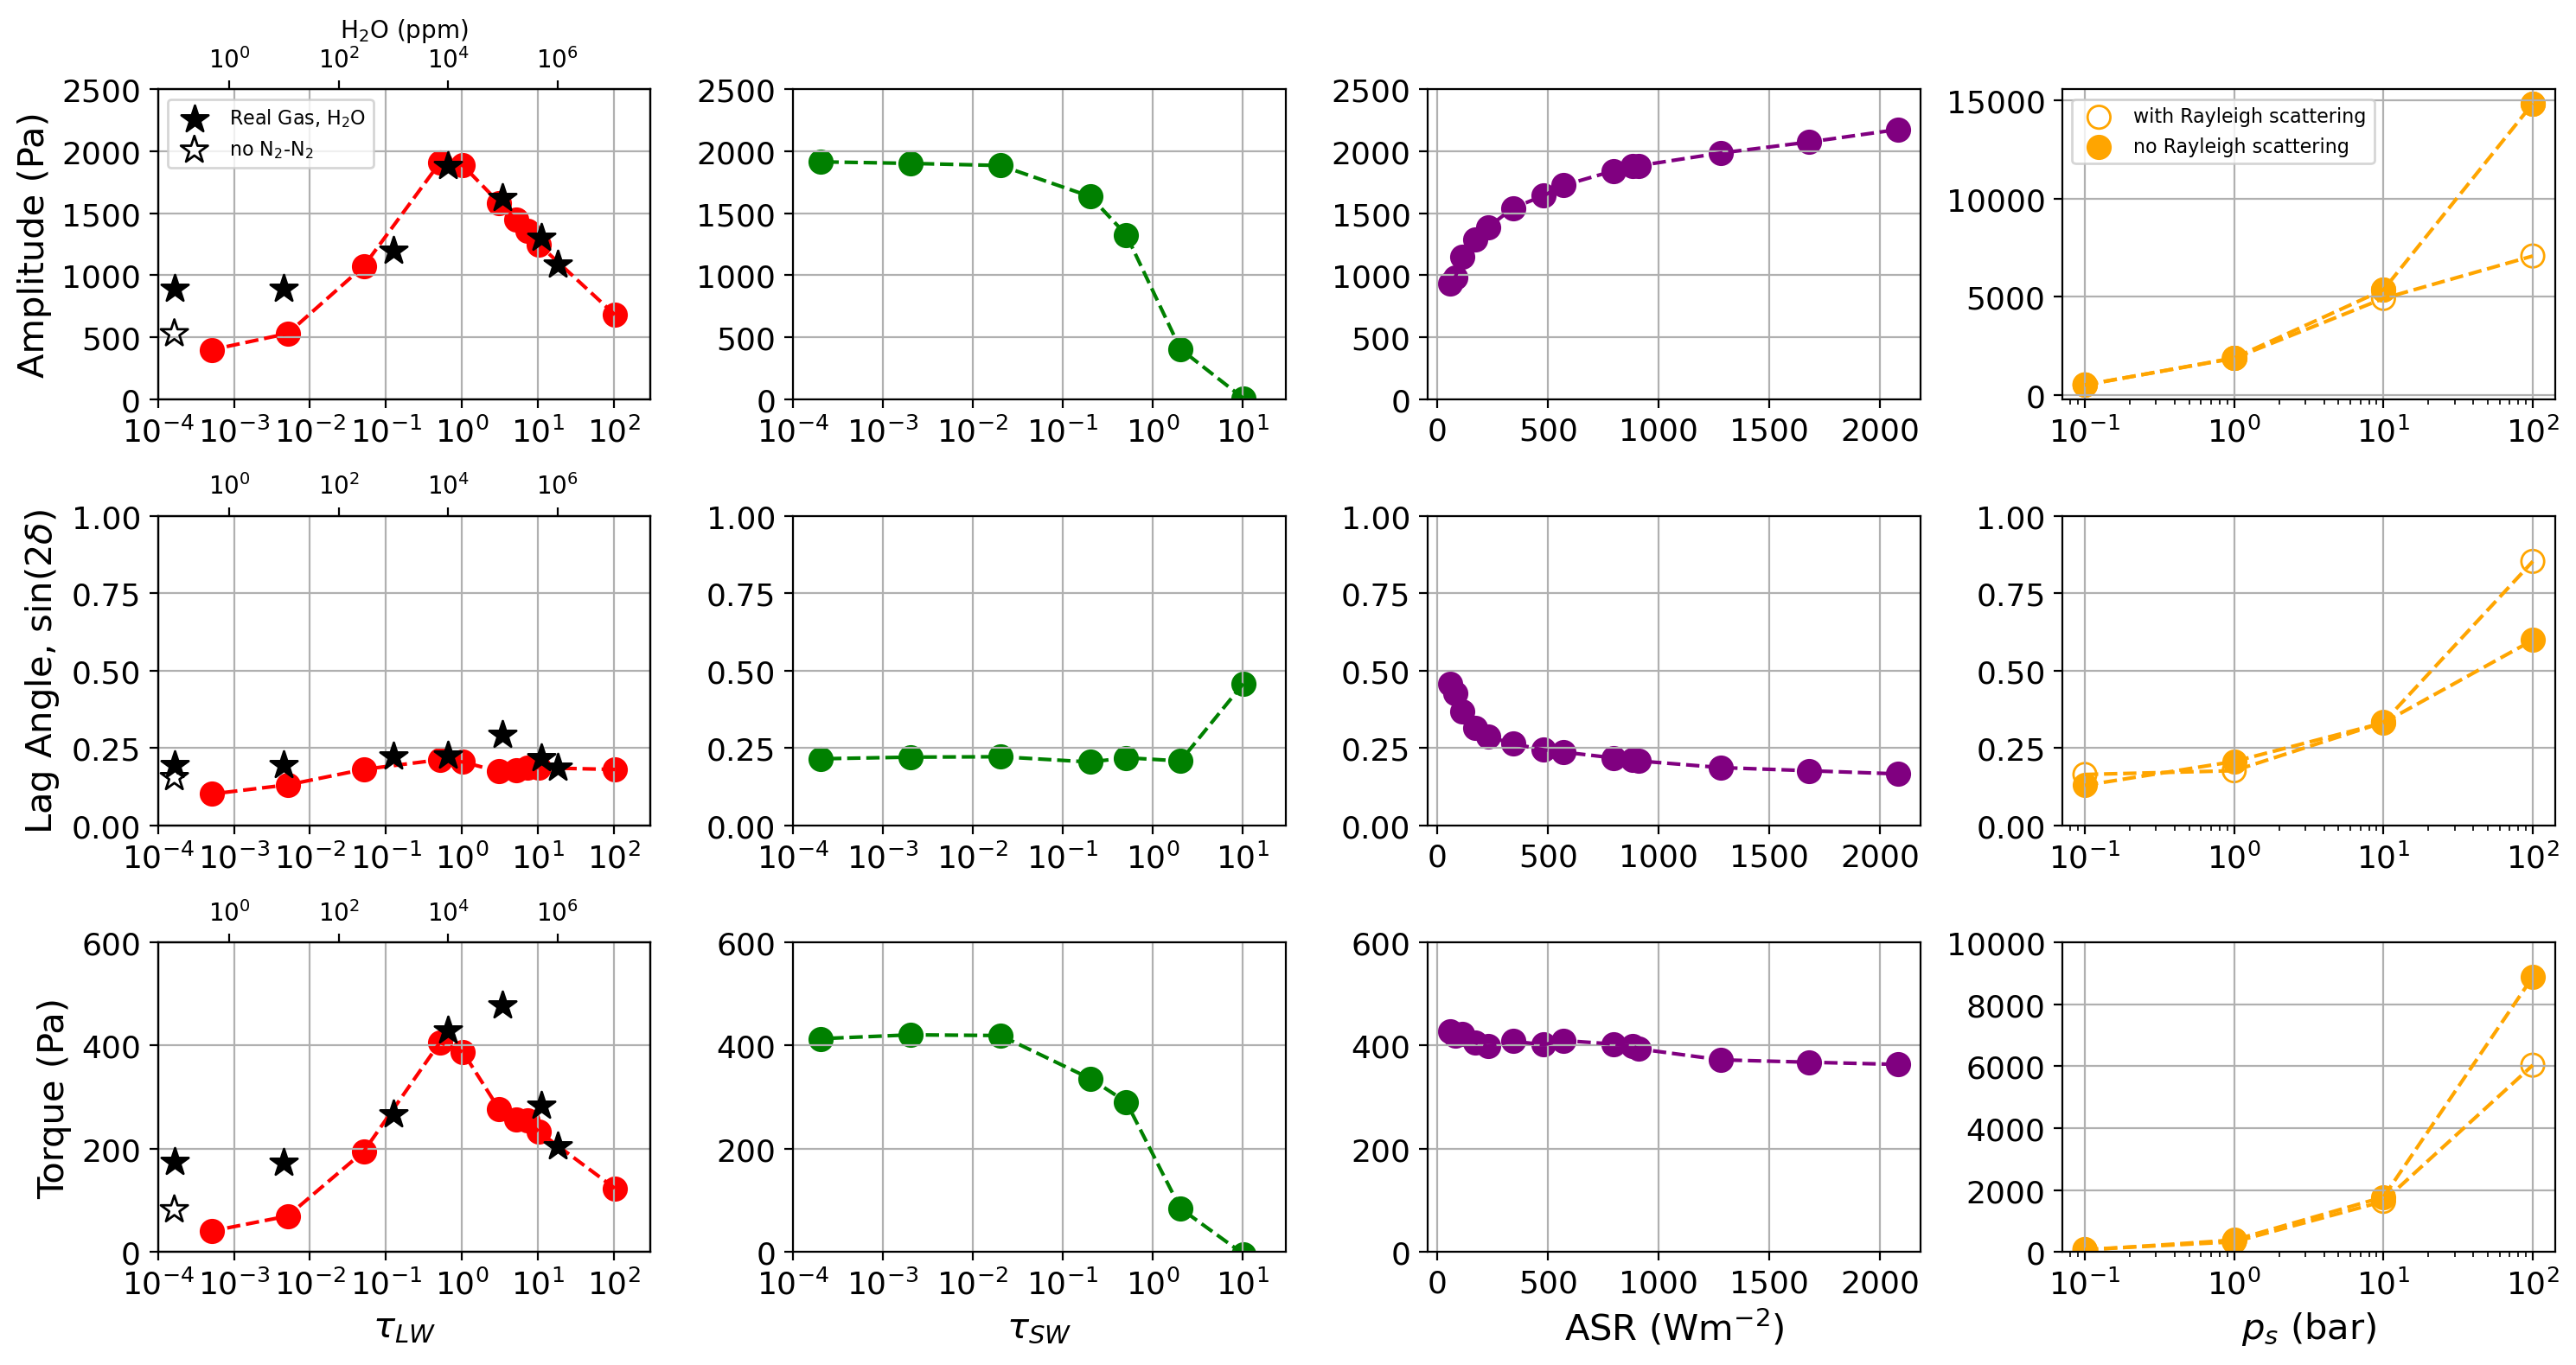

In [109]:
## redo figure
fig, ax = plt.subplots(3,4, figsize=(15,8), dpi=200,tight_layout = True)

torque_grid = [[taulw_amp, tausw_amp, ASR_amp, ps_amp],[taulw_lag, tausw_lag, ASR_lag, ps_lag],[taulw_im_q, tausw_im_q, ASR_imq, ps_im_q]]
x_list = [taulw_list, tausw_list, ASR_list, ps_list]
color = ['r', 'g', 'purple', 'orange']
for i in range(3):
    ax[i,0].set_xscale('log')
    ax[i,1].set_xscale('log')
    ax[i,3].set_xscale('log')
    
    ax[i,0].set_xlim(1e-4,300)
    ax[i,1].set_xlim(1e-4,30)
    ax[i,0].set_xticks([1e-4,1e-3,1e-2,1e-1,1,10,100])
    ax[i,1].set_xticks([1e-4,1e-3,1e-2,1e-1,1,10])
    ax[i,2].set_xticks([0,500,1000,1500,2000,2500])
    for j in range(4):
        ax[i,j].scatter(x_list[j], torque_grid[i][j], color = color[j], s=90)
        ax[i,j].plot(x_list[j], torque_grid[i][j], '--',color = color[j])
        ax[i,j].grid()
        ax[i,j].xaxis.set_tick_params(labelsize=13)
        ax[i,j].yaxis.set_tick_params(labelsize=13)
        
        if j < 3:
            ax[0,j].set_yticks([0,500,1000,1500,2000, 2500])
            ax[0,j].set_ylim(0, 2500)
            ax[2,j].set_ylim(0, 600)
        ax[1,j].set_ylim(0, 1)
        ax[0,3].set_yticks([0,5000,10000,15000,20000])
        ax[2,3].set_ylim(0,10000)
        ax[2,3].set_yticks([0,2000,4000,6000,8000,10000])
        
ax[0,3].scatter(ps_list, ps_ray_amp, facecolor = 'none',edgecolor = 'orange',s=90, label = 'with Rayleigh scattering')
ax[0,3].scatter(ps_list, ps_amp,s=90, color='orange',label = 'no Rayleigh scattering')
ax[0,3].plot(ps_list,ps_ray_amp, '--',color = color[3])
ax[1,3].scatter(ps_list, ps_ray_lag, facecolor = 'none',edgecolor = 'orange',s=90)
ax[1,3].plot(ps_list,ps_ray_lag, '--',color = color[3])

ax[2,3].scatter(ps_list, ps_ray_im_q, facecolor = 'none',edgecolor = 'orange',s=90)
ax[2,3].plot(ps_list,ps_ray_im_q, '--',color = color[3])
        
ax[0,0].set_ylabel('Amplitude (Pa)', fontsize=15)
ax[1,0].set_ylabel('Lag Angle, sin(2$\delta$)', fontsize=15)
ax[2,0].set_ylabel('Torque (Pa)', fontsize=15)   
  
    
ax[2,0].set_xlabel('$\\tau_{LW}$',fontsize=15)
ax[2,1].set_xlabel('$\\tau_{SW}$',fontsize=15)
ax[2,2].set_xlabel('ASR (Wm$^{-2}$)',fontsize=15)   
ax[2,3].set_xlabel('$p_s$ (bar)',fontsize=15)   

ax2 = ax[0,0].twiny()
ax2.scatter(h2o_real_list, h2o_real_amp, color = 'black', marker='*', s = 140, label = 'Real Gas, H$_2$O')
ax2.scatter(h2o_real_noN2abs[0], h2o_real_noN2abs[1], edgecolor = 'black', facecolor='none',marker='*', s = 140, label = 'no N$_2$-N$_2$ ')
ax2.set_xscale('log')
ax2.set_xlabel('H$_2$O (ppm)')
ax2.set_xlim(0.5e-1,5e7)
#ax2.set_xticks([1e-1,1e1,1e3,1e5,1e7])
ax2.legend(loc = 'upper left', fontsize=8)

ax3 = ax[1,0].twiny()
ax3.scatter(h2o_real_list, h2o_real_lag, color = 'black', marker='*', s = 140)
ax3.scatter(h2o_real_noN2abs[0], h2o_real_noN2abs[2], edgecolor = 'black', facecolor='none',marker='*', s = 140)

ax3.set_xscale('log')
#ax3.set_xlabel('H$_2$O (ppm)')
ax3.set_xlim(0.5e-1,5e7)

ax4 = ax[2,0].twiny()
ax4.scatter(h2o_real_list, h2o_real_im_q, color = 'black', marker='*', s = 140)
ax4.scatter(h2o_real_noN2abs[0], h2o_real_noN2abs[3], edgecolor = 'black', facecolor='none',marker='*', s = 140)
ax4.set_xscale('log')
#ax4.set_xlabel('H$_2$O (ppm)')
ax4.set_xlim(0.5e-1,5e7)


ax[0,3].legend(fontsize=8)

plt.savefig('./Paper Plots/SW_2024_Figure2.pdf', bbox_inches = 'tight')